In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Key difference with perceptron: weights are updated based on a linear activation function, not unit step function.

Goal is to minimize the SSE

$$
J(w) = 1/2 \sum_i (y_i - \phi(z_i))^2 \\
= 1/2 \sum_i (y_i - w'x)^2
$$

We minimize the SSE with gradient descent

$$
w := w + \Delta w = w + \eta \Delta J(w) \\
\Delta J(w) = \frac{\delta J(w)}{\delta w} = -\sum_i (y_i - w'x_i) x_i
$$

In [73]:
class AdalineGD(object):
    """
    Adaptive LInear Neuron Classifier
    
    Parameters
    ----------
    n_iter : int
        How many passes we'll do with gradient descent
        (we need this bound or it'll never stop)
    
    Attributes
    ----------
    
    
    """
    def __init__(self, eta, n_iter):
        self.eta = eta
        self.n_iter = n_iter
    
    def fit(self, X, y):
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        N, J = X.shape
        
        self.w_ = np.zeros(J)
        self.SSE_ = list()
        
        for _ in range(self.n_iter):
            gradient = - X.T.dot(y - X.dot(self.w_))
            self.w_ += - self.eta * gradient
            
            SSE = np.sum((y - X.dot(self.w_)) ** 2) / 2
            self.SSE_.append(SSE)
            
        return self
            
    def predict(self, X):
        return X.dot(self.w_)

In [74]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/'
                 'machine-learning-databases/iris/iris.data', 
                 header=None)
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', 1, -1)
X = df.iloc[0:100, [0, 2]].values

In [75]:
ada1 = AdalineGD(eta=0.01, n_iter=10).fit(X, y)

In [76]:
ada1.w_

array([  3.79038389e+13,   2.11689469e+14,   1.18464807e+14])

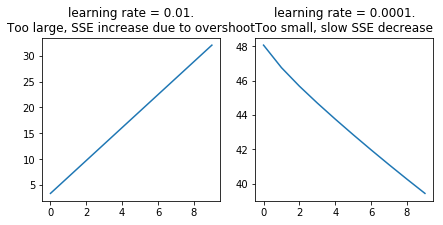

In [81]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))
ada1 = AdalineGD(eta=0.01, n_iter=10).fit(X, y)
ax[0].plot(range(len(ada1.SSE_)), np.log10(ada1.SSE_))
ax[0].set_title('learning rate = 0.01.\nToo large, SSE increase due to overshoot')
ada2 = AdalineGD(eta=0.0001, n_iter=10).fit(X, y)
ax[1].plot(range(len(ada2.SSE_)), ada2.SSE_)
ax[1].set_title('learning rate = 0.0001.\nToo small, slow SSE decrease')

Should standardize the variable so that the learning rate is the same for all